In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [3]:
os.chdir("C:\Python Trainer\mlarmy\Online Class\Logistic Regression")
fram_data = pd.read_csv("framingham.csv")
fram_data.head()
fram_data.columns
fram_data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
#lets check null values first and use fillna function to fill the null values
print(fram_data.isnull().sum())
m = fram_data.education.mode()
fram_data.education = fram_data.education.fillna(int(m))
fram_data.cigsPerDay = fram_data.cigsPerDay.fillna(int(fram_data.cigsPerDay.mean()))
fram_data.BPMeds = fram_data.BPMeds.fillna(int(fram_data.BPMeds.mode()))
fram_data.totChol = fram_data.totChol.fillna(int(fram_data.totChol.mean()))
fram_data.BMI = fram_data.BMI.fillna(int(fram_data.BMI.mean()))
fram_data.heartRate = fram_data.heartRate.fillna(int(fram_data.heartRate.mean()))
fram_data.glucose = fram_data.glucose.fillna(int(fram_data.glucose.mean()))
print(fram_data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#Perform some type conversions. The following cols should be catagorical type and so change the dtype to 'object'
#'male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'
#The following cols should be numeric integers so convert to 'int64'
#'age', 'cigsPerDay', 'totChol', 'heartRate', 'glucose'

In [5]:
cat_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for i in cat_cols:
    fram_data[i] = fram_data[i].astype(np.object)
print(fram_data.dtypes)
print("----------------------------------------")

num_int64_cols = ['age', 'cigsPerDay', 'totChol', 'heartRate', 'glucose']
for i in num_int64_cols:
    fram_data[i] = fram_data[i].astype(np.int64)
print(fram_data.dtypes)


male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
----------------------------------------
male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay           int64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object


In [6]:
fram_data.head()
#We are all set to split the data into train and test
X = fram_data.drop('TenYearCHD', axis = 1)
X.head()
y = fram_data["TenYearCHD"]
y.head()

#Lets use train_test_split to split X and y into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2968, 15) (1272, 15) (2968,) (1272,)


#Build logistic regression model 

In [7]:
#fit the model on train data 
log_reg = LogisticRegression().fit(x_train, y_train)

#predict on train 
train_preds = log_reg.predict(x_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))

#predict on test
test_preds = log_reg.predict(x_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))


Model accuracy on train is:  0.850404312668
Model accuracy on test is:  0.86320754717
ROC score on train is:  0.531463241424
ROC score on test is:  0.527699607666
confusion_matrix train is:  [[2493    9]
 [ 435   31]]
confusion_matrix test is:  [[1087    7]
 [ 167   11]]


In [8]:
import scikitplot as skplt
import matplotlib.pyplot as plt

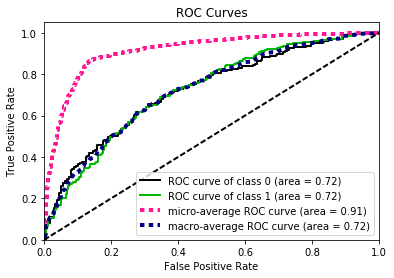

In [9]:
skplt.metrics.plot_roc(y_test,log_reg.predict_proba(x_test))
plt.show()

Conclusion: 
#The accuracy is very good (above 80%) however AUC value is on the lower side. We may have requested more data from client inorder to improve AUC score while not compromising on accuracy which is most widely used metric in classification problems. 